In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

# from fungsi import sigmoid #jika sigmoid fungsi ingin dibuat sebagai library terpisah

Pembuatan Fungsi yang Dibutuhkan

In [2]:
def sigmoid(x):
	return 1/(1+np.exp(-x))

#Generate Data

Data Otong

In [3]:
# tinggi badan
x1 = np.array([18 + 1*np.random.randn() for i in range(1,100)])
# berat badan
x2 = np.array([5 + 1*np.random.randn() for i in range(1,100)])
# status otong
y1 = np.array([1 for i in range(1,100)])
# status ucup
y2 = np.array([0 for i in range(1,100)])
# label
label = ["otong" for i in range(1,100)]

# data compilasi
data_otong = {
	'x1':x1,
	'x2':x2,
	'y1':y1,
	'y2':y2,
	'label':label,
}

# data frame
data_frame_1 = pd.DataFrame(data=data_otong)

In [4]:
print(data_frame_1)

           x1        x2  y1  y2  label
0   17.999479  3.529870   1   0  otong
1   18.886549  6.832486   1   0  otong
2   16.491159  5.094077   1   0  otong
3   19.487119  6.345853   1   0  otong
4   17.304270  5.907503   1   0  otong
..        ...       ...  ..  ..    ...
94  17.366124  3.005668   1   0  otong
95  18.119738  4.256644   1   0  otong
96  18.276639  4.332215   1   0  otong
97  18.207644  3.047350   1   0  otong
98  18.421649  4.942796   1   0  otong

[99 rows x 5 columns]


Data Ucup

In [5]:
# tinggi badan
x1 = np.array([10 + 1*np.random.randn() for i in range(1,100)])
# berat badan
x2 = np.array([8 + 1*np.random.randn() for i in range(1,100)])
# status otong
y1 = np.array([0 for i in range(1,100)])
# status ucup
y2 = np.array([1 for i in range(1,100)])
# label
label = ["ucup" for i in range(1,100)]

# data compilasi
data_ucup = {
	'x1':x1,
	'x2':x2,
	'y1':y1,
	'y2':y2,
	'label':label,
}

# data frame
data_frame_2 = pd.DataFrame(data=data_ucup)

In [6]:
print(data_frame_2)

           x1        x2  y1  y2 label
0   11.191878  9.460368   0   1  ucup
1   10.598507  8.093665   0   1  ucup
2   10.090694  8.992259   0   1  ucup
3    9.787370  9.177276   0   1  ucup
4   10.922183  8.571368   0   1  ucup
..        ...       ...  ..  ..   ...
94   9.109199  6.008608   0   1  ucup
95  10.525649  6.774331   0   1  ucup
96  10.389877  9.471865   0   1  ucup
97  13.344643  7.639713   0   1  ucup
98   9.866248  8.099048   0   1  ucup

[99 rows x 5 columns]


#Gabungkan data

In [7]:
data_frame = pd.concat([data_frame_1,data_frame_2])
data_frame = shuffle(data_frame) #untuk mengacak data Otong dan Ucup, pakai method dari sklearn
data_frame.reset_index(inplace=True,drop=True)

In [8]:
print(data_frame)

            x1        x2  y1  y2  label
0    16.504525  4.046832   1   0  otong
1    10.608527  8.420800   0   1   ucup
2    16.363194  5.405978   1   0  otong
3     9.682976  6.820688   0   1   ucup
4    11.683328  8.682332   0   1   ucup
..         ...       ...  ..  ..    ...
193   8.608882  7.272473   0   1   ucup
194  17.304270  5.907503   1   0  otong
195  10.598507  8.093665   0   1   ucup
196  10.271742  8.795856   0   1   ucup
197  18.013641  5.109881   1   0  otong

[198 rows x 5 columns]


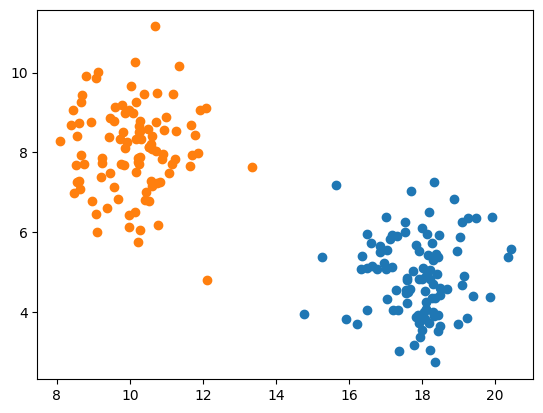

In [9]:
plt.scatter(data_frame_1.x1,data_frame_1.x2)
plt.scatter(data_frame_2.x1,data_frame_2.x2)
# plt.legend(data_frame.label)
plt.show()

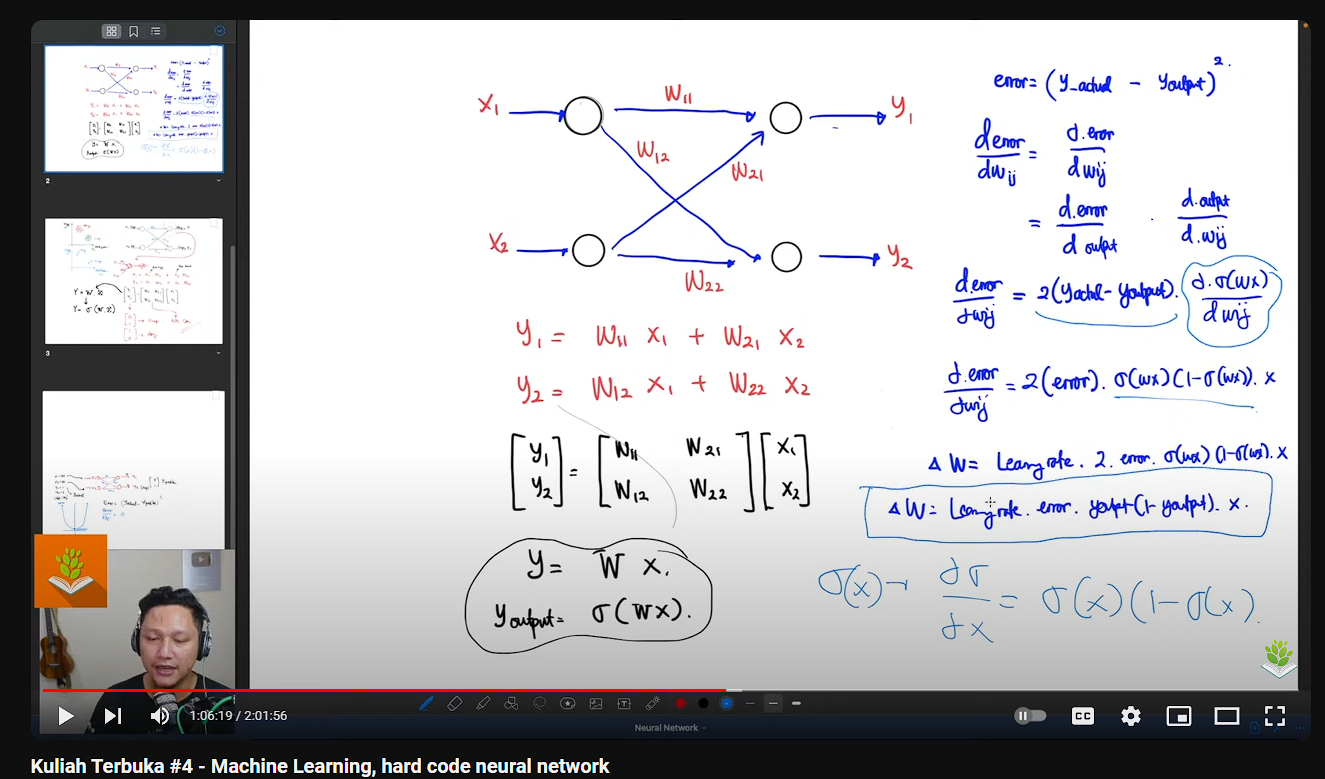

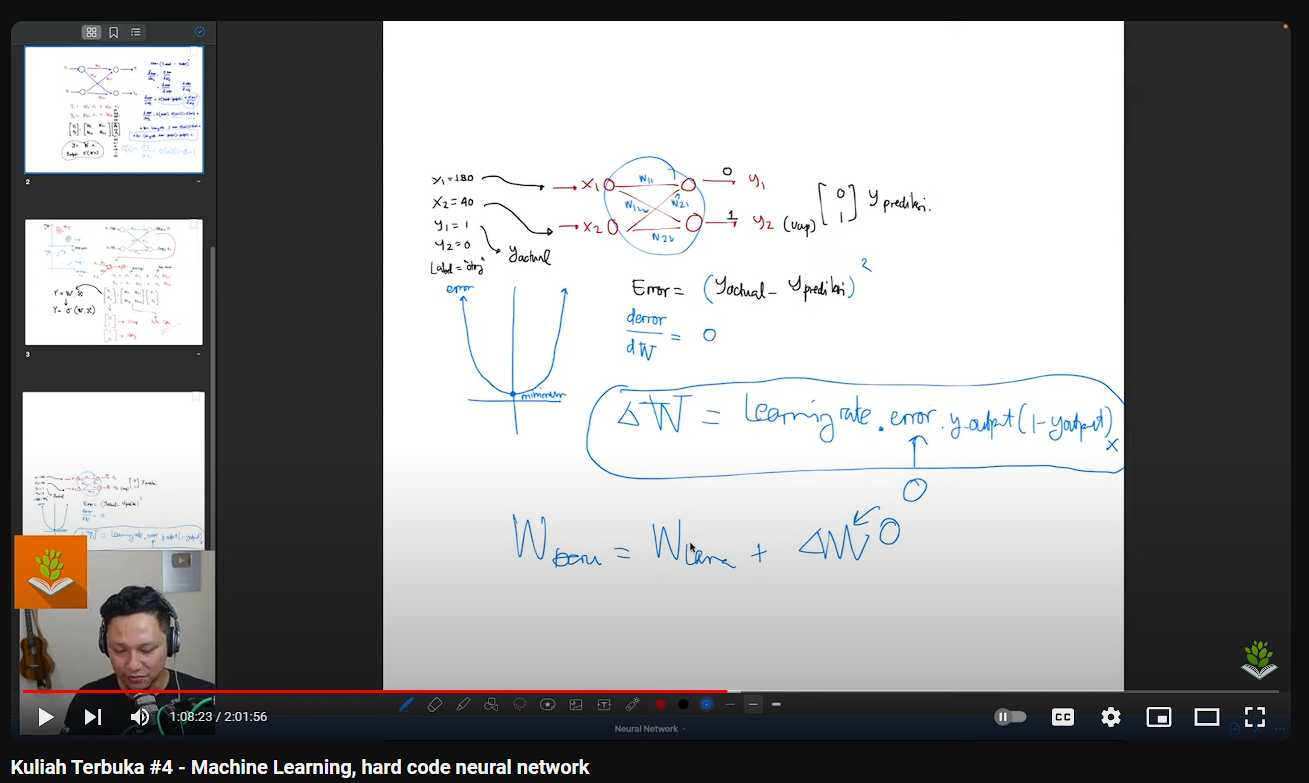

#Neural Networknya

## 1. Matrix Weight

In [10]:
w11 = np.random.uniform(-0.01,0.01)
w12 = np.random.uniform(-0.01,0.01)
w21 = np.random.uniform(-0.01,0.01)
w22 = np.random.uniform(-0.01,0.01)

W = np.array([[w11,w12],[w21,w22]])

In [11]:
print(W)

[[ 0.00796874  0.00215243]
 [ 0.00269628 -0.00682985]]


## 2. Iterasi Neural Networknya

In [12]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2,len(data_frame)))
for index,baris in data_frame.iterrows(): #iterrows method pandas
  # print(index)
  # print(baris)
  # print(baris.label)
  # print(baris.x1)
	W_lama = W
	input = np.array([[baris.x1],[baris.x2]])
	output_hidden = np.dot(W_lama,input)
	output_learn = sigmoid(output_hidden)
  #  print(output_learn)
	output_actual = np.array([[baris.y1],[baris.y2]])

	error = output_actual - output_learn

	delta_W = np.dot(learning_rate*error*output_learn*(1-output_learn),input.T)

	W_baru = W_lama + delta_W
	W = W_baru

	error_array[:,index] = error.T*error.T

	tebakan = np.argmax(output_learn)
	jawaban = np.argmax(output_actual)

	label_tebakan = "ucup" if tebakan == 1 else "otong"

	print(f"index = {index}, tebakan = {label_tebakan}, jawaban = {baris.label}")

	if tebakan == jawaban:
		answer.append(1)
	else:
		answer.append(0)

index = 0, tebakan = otong, jawaban = otong
index = 1, tebakan = otong, jawaban = ucup
index = 2, tebakan = otong, jawaban = otong
index = 3, tebakan = otong, jawaban = ucup
index = 4, tebakan = ucup, jawaban = ucup
index = 5, tebakan = ucup, jawaban = otong
index = 6, tebakan = ucup, jawaban = ucup
index = 7, tebakan = ucup, jawaban = ucup
index = 8, tebakan = ucup, jawaban = otong
index = 9, tebakan = otong, jawaban = ucup
index = 10, tebakan = ucup, jawaban = ucup
index = 11, tebakan = ucup, jawaban = otong
index = 12, tebakan = ucup, jawaban = ucup
index = 13, tebakan = ucup, jawaban = ucup
index = 14, tebakan = ucup, jawaban = ucup
index = 15, tebakan = ucup, jawaban = ucup
index = 16, tebakan = ucup, jawaban = otong
index = 17, tebakan = otong, jawaban = ucup
index = 18, tebakan = ucup, jawaban = ucup
index = 19, tebakan = ucup, jawaban = otong
index = 20, tebakan = otong, jawaban = ucup
index = 21, tebakan = otong, jawaban = otong
index = 22, tebakan = ucup, jawaban = ucup
index

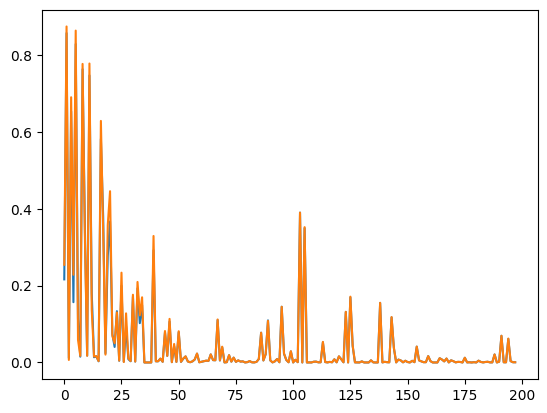

In [13]:
plt.plot(error_array.T)

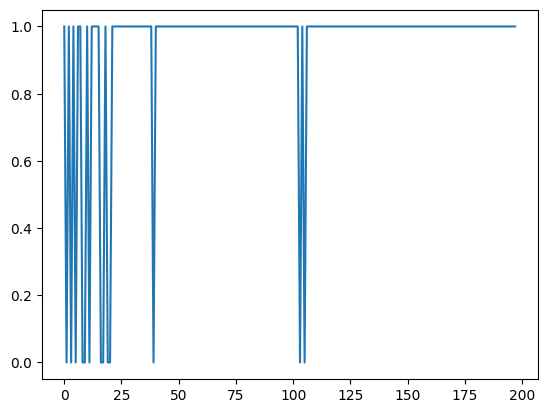

In [14]:
plt.plot(answer)

In [15]:
x1 = 19
x2 = 3

input = np.array([[x1],[x2]])
output_hidden = np.dot(W,input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)

label_prediction = "ucup" if prediction == 1 else "otong"

print(f"tinggi = {x1*10}, berat = {x2*10}, adalah {label_prediction}")

tinggi = 190, berat = 30, adalah otong
